# Inputs and Correlations (based on Xavier's notebook)

So I'd like to try this out with the file Xavier used and the first one of the ones I used for training and testing. It looks like one is TTToSemiLeptonic while the others are QCD samples, right? Or is there no real difference?

### Loading modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
import uproot    # uproot version3? Will try uproot4 then
import uproot4

### Plot styling

In [3]:
plt.style.use([hep.style.ROOT, hep.style.firamath])
hep.rcParams.label.data = True
hep.rcParams.label.paper = False

### Opening the files

##### The file Xavier used

In [4]:
file = "root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/user/anovak/PFNano/106X_v2_17/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_new_pmx_94X_mc2017_realistic_v14-v1PFNanoV2/210101_174326/0000/nano_mc2017_10.root"

##### The first QCD file used for training

In [5]:
file_0 = "root://xrootd-cms.infn.it///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_10.root"

In [8]:
tree = uproot.open(file, library='pd')['Events']
tree.keys()

TypeError: unrecognized options: library

Ok, so uproot3 does not have the option library it seems...

Then maybe uproot4 does?

In [10]:
tree = uproot4.open(file, library='pd')['Events']
tree.keys()

OSError: XRootD error: [FATAL] Auth failed
in file root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/user/anovak/PFNano/106X_v2_17/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_new_pmx_94X_mc2017_realistic_v14-v1PFNanoV2/210101_174326/0000/nano_mc2017_10.root

And this happened although the proxy was working before starting the juptyer server / notebook.

In [11]:
tree = uproot4.open(file_0, library='pd')['Events']
tree.keys()

OSError: XRootD error: [ERROR] Operation expired
in file root://xrootd-cms.infn.it///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_10.root

Yet another problem, but with the old file.

## "Did you try switching it off and on again?"

Again tried to use the proxy I created on the hpc, after checking that 
```
Your proxy is valid until Tue Mar  9 08:16:16 2021
Error: verification failed.
Cannot verify AC signature!
(my-env) um106329@x86_64-conda-linux-gnu:~[505]$ xrdcp root://xrootd-cms.infn.it///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_23.root /hpcwork/um106329
[0B/0B][100%][==================================================][0B/s]
Run: [ERROR] Server responded with an error: [3011] No servers are available to read the file. (source)

(my-env) um106329@x86_64-conda-linux-gnu:~[506]$ xrdcp -d 1 -f root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/user/anovak/PFNano/106X_v2_17/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_new_pmx_94X_mc2017_realistic_v14-v1PFNanoV2/210101_174326/0000/nano_mc2017_10.root /dev/null
[343.1MB/343.1MB][100%][==================================================][114.4MB/s]
(my-env) um106329@x86_64-conda-linux-gnu:~[507]$
```

works at least partially.

In [7]:
tree = uproot4.open(file, library='pd')['Events']
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'CorrT1METJet_area',
 'CorrT1METJet_eta',
 'CorrT1METJet_muonSubtrFactor',
 'CorrT1METJet_phi',
 'CorrT1METJet_rawPt',
 'nJetPFCands',
 'JetPFCands_pt',
 'JetPFCands_btagEtaRel',
 'JetPFCands_btagPtRatio',
 'JetPFCands_btagPParRatio',
 'JetPFCands_btagSip3dVal',
 'JetPFCands_btagSip3dSig',
 'JetPFCands_btagJetDistVal',
 'JetPFCands_pFCandsIdx',
 'JetPFCands_jetIdx',
 'nJetSVs',
 '

Nice, so this one works finally!

In [8]:
tree = uproot4.open(file_0, library='pd')['Events']
tree.keys()

OSError: XRootD error: [ERROR] Operation expired
in file root://xrootd-cms.infn.it///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_10.root

And this is not due to the proxy I suppose, but rather due to the file itself?

### New redirector necessary?

It looks like the old paths that worked (in December) are not working anymore. (Or it's something else I don't see.)

Will now try some more variants in front of the path to the file.

In [9]:
file_0_new = "root://grid-cms-xrootd.physik.rwth-aachen.de:1094///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_10.root"

In [10]:
tree = uproot4.open(file_0_new, library='pd')['Events']
tree.keys()

FileNotFoundError: file not found ([ERROR] Server responded with an error: [3011] No such file
)

    'root://grid-cms-xrootd.physik.rwth-aachen.de:1094///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_10.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot4.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


Not this one...

In [11]:
file_0_new_2 = "root://cms-xrd-global.cern.ch///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_10.root"

In [12]:
tree = uproot4.open(file_0_new_2, library='pd')['Events']
tree.keys()

OSError: XRootD error: [ERROR] Operation expired
in file root://cms-xrd-global.cern.ch///store/user/anovak/PFNano/106X_vA01/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/RunIIFall17PFNanoAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/201109_223637/0000/nano106X_on_mini106X_2017_mc_NANO_10.root

This is weird, again it throws the message from above, but with another way of accessing the file.

## Just replicating the method with Xavier's file then

In [13]:
jet_input_branches = ["event", "Jet_pt","Jet_eta", "Jet_hadronFlavour", "Jet_btagDeepB", "Jet_btagDeepFlavB"]
deepCSV_input_branches = [x for x in tree.keys() if 'Jet_DeepCSV' in x]
jet_input_branches.extend(deepCSV_input_branches)

In [14]:
df = tree.arrays(jet_input_branches, library='pd')
df.unstack()
df

event     Jet_pt   Jet_eta  Jet_hadronFlavour  \
entry subentry                                                     
0     0            53092  70.000000  0.851807                  5   
      1            53092  44.750000  0.649292                  0   
      2            53092  36.687500 -1.952148                  0   
      3            53092  31.406250 -2.299805                  0   
      4            53092  23.921875 -0.038628                  5   
...                  ...        ...       ...                ...   
48383 10        37359647  17.625000  2.661621                  0   
      11        37359647  16.765625 -4.892578                  0   
      12        37359647  16.500000 -2.282715                  0   
      13        37359647  15.117188 -0.602051                  0   
      14        37359647  15.007812  1.279541                  0   

                Jet_btagDeepB  Jet_btagDeepFlavB  \
entry subentry                                     
0     0              0.625000           0.939941   
      1              0.020111           0.026840   
      2             -1.000000           0.045349   
      3              0.033844           0.012695   
      4              0.683594           0.792480   
...                       ...                ...   
48383 10            -1.000000           0.667969   
      11            -1.000000           0.194824   
      12             0.083801           0.054169   
      13             0.080627           0.034027   
      14            -1.000000           0.044006   

                Jet_DeepCSV_flightDistance2dSig  \
entry subentry                                    
0     0                               24.515625   
      1                             -999.000000   
      2                             -999.000000   
      3                             -999.000000   
      4                               32.000000   
...                                         ...   
48383 10                            -999.000000   
      11                            -999.000000   
      12                            -999.000000   
      13                            -999.000000   
      14                            -999.000000   

                Jet_DeepCSV_flightDistance2dVal  \
entry subentry                                    
0     0                                0.833008   
      1                             -999.000000   
      2                             -999.000000   
      3                             -999.000000   
      4                                0.481201   
...                                         ...   
48383 10                            -999.000000   
      11                            -999.000000   
      12                            -999.000000   
      13                            -999.000000   
      14                            -999.000000   

                Jet_DeepCSV_flightDistance3dSig  \
entry subentry                                    
0     0                               24.578125   
      1                             -999.000000   
      2                             -999.000000   
      3                             -999.000000   
      4                               32.031250   
...                                         ...   
48383 10                            -999.000000   
      11                            -999.000000   
      12                            -999.000000   
      13                            -999.000000   
      14                            -999.000000   

                Jet_DeepCSV_flightDistance3dVal  ...  \
entry subentry                                   ...   
0     0                                1.133789  ...   
      1                             -999.000000  ...   
      2                             -999.000000  ...   
      3                             -999.000000  ...   
      4                                0.481689  ...   
...                                         ...  ...   
48383 10         

In [15]:
df = df[(df['Jet_pt']>25) & (abs(df['Jet_eta'])<2.5)]

In [16]:
df = df.reset_index()

### Cleaning of the deepCSV inputs

In [17]:
pd.options.mode.use_inf_as_na = False

In [18]:
df[deepCSV_input_branches]

,Jet_DeepCSV_flightDistance2dSig,Jet_DeepCSV_flightDistance2dVal,Jet_DeepCSV_flightDistance3dSig,Jet_DeepCSV_flightDistance3dVal,Jet_DeepCSV_trackDecayLenVal_0,Jet_DeepCSV_trackDecayLenVal_1,Jet_DeepCSV_trackDecayLenVal_2,Jet_DeepCSV_trackDecayLenVal_3,Jet_DeepCSV_trackDecayLenVal_4,Jet_DeepCSV_trackDecayLenVal_5,...,Jet_DeepCSV_trackSumJetDeltaR,Jet_DeepCSV_trackSumJetEtRatio,Jet_DeepCSV_vertexCategory,Jet_DeepCSV_vertexEnergyRatio,Jet_DeepCSV_vertexJetDeltaR,Jet_DeepCSV_vertexMass,Jet_DeepCSV_jetNSecondaryVertices,Jet_DeepCSV_jetNSelectedTracks,Jet_DeepCSV_jetNTracksEtaRel,Jet_DeepCSV_vertexNTracks
0,24.515625,0.833008,24.578125,1.133789,1.752930,0.519043,1.481445,0.019836,2.948555e+33,0.0,...,0.015411,0.389893,0.0,0.715820,0.026459,1.063477,1,4,2,2
1,-999.000000,-999.000000,-999.000000,-999.000000,0.038208,0.000000,0.000000,0.000000,4.816895e-01,0.0,...,0.003975,0.921875,2.0,-999.000000,-999.000000,-999.000000,0,1,0,0
2,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-999.0,...,-999.000000,-999.000000,-999.0,-999.000000,-999.000000,-999.000000,0,0,0,0
3,-999.000000,-999.000000,-999.000000,-999.000000,0.722168,0.002403,0.168091,0.019836,2.948555e+33,0.0,...,0.073669,0.500488,2.0,-999.000000,-999.000000,-999.000000,0,3,0,0
4,-999.000000,-999.000000,-999.000000,-999.000000,0.046204,0.062561,0.130615,0.465576,1.191406e-01,60129280.0,...,0.038971,0.486084,2.0,-999.000000,-999.000000,-999.000000,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225682,-999.000000,-999.000000,-999.000000,-999.000000,0.148926,0.010544,0.011169,0.066467,2.700806e-02,60129280.0,...,0.036438,0.446045,2.0,-999.000000,-999.000000,-999.000000,0,5,0,0
225683,5.628906,0.134155,6.703125,0.296875,0.591309,0.123474,0.000000,0.000000,0.000000e+00,0.0,...,0.087402,0.650879,0.0,1.000000,0.157471,15.250000,1,2,2,2
225684,205.375000,1.165039,204.625000,1.293945,0.914551,0.947266,3.566406,0.816895,8.659363e-03,60129280.0,...,0.034454,0.393555,0.0,0.819824,0.064392,2.859375,1,5,6,6
225685,-999.000000,-999.000000,-999.000000,-999.000000,0.005775,0.724609,0.024261,0.000000,0.000000e+00,0.0,...,0.045197,0.203979,2.0,-999.000000,-999.000000,-999.000000,0,3,0,0


In [19]:
# Typical uncleaned data
df['Jet_DeepCSV_trackDecayLenVal_4'].describe()

count    2.211410e+05
mean              NaN
std               NaN
min     -2.768117e+38
25%      0.000000e+00
50%      0.000000e+00
75%      6.036377e-02
max               inf
Name: Jet_DeepCSV_trackDecayLenVal_4, dtype: float64

In [20]:
pd.options.mode.use_inf_as_na = True

In [21]:
df['Jet_DeepCSV_trackDecayLenVal_4'].describe()

count    2.211400e+05
mean              NaN
std               NaN
min     -2.768117e+38
25%      0.000000e+00
50%      0.000000e+00
75%      6.036377e-02
max      4.421241e+36
Name: Jet_DeepCSV_trackDecayLenVal_4, dtype: float64

In [22]:
df[deepCSV_input_branches].isna().mean().tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011050702964725483,
 0.01318197326385658,
 0.020147372245632227,
 0.0317386468870604,
 0.0,
 0.0,
 0.011050702964725483,
 0.01318197326385658,
 0.020147372245632227,
 0.0317386468870604,
 0.0,
 0.0,
 0.0049094542441523,
 0.0055873842977220665,
 0.0,
 0.0,
 0.011055133880108292,
 0.01318197326385658,
 0.020151803161015034,
 0.0317386468870604,
 0.0,
 0.0,
 0.0,
 0.011055133880108292,
 0.01318197326385658,
 0.020151803161015034,
 0.0317386468870604,
 0.0,
 0.0,
 0.011055133880108292,
 0.01318197326385658,
 0.020151803161015034,
 0.0317386468870604,
 0.0,
 0.0,
 0.0,
 0.011055133880108292,
 0.01318197326385658,
 0.020151803161015034,
 0.0317386468870604,
 0.0,
 0.0,
 0.0,
 0.0,
 0.011055133880108292,
 0.01318197326385658,
 0.020151803161015034,
 0.0317386468870604,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [23]:
df = df.fillna(-999)

In [24]:
df[deepCSV_input_branches].isna().mean().tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [25]:
df = df.applymap(lambda x: -999 if x < -999 else x)
df = df.applymap(lambda x: -999 if x > 1000 else x)

In [26]:
df.describe()

,entry,subentry,event,Jet_pt,Jet_eta,Jet_hadronFlavour,Jet_btagDeepB,Jet_btagDeepFlavB,Jet_DeepCSV_flightDistance2dSig,Jet_DeepCSV_flightDistance2dVal,...,Jet_DeepCSV_trackSumJetDeltaR,Jet_DeepCSV_trackSumJetEtRatio,Jet_DeepCSV_vertexCategory,Jet_DeepCSV_vertexEnergyRatio,Jet_DeepCSV_vertexJetDeltaR,Jet_DeepCSV_vertexMass,Jet_DeepCSV_jetNSecondaryVertices,Jet_DeepCSV_jetNSelectedTracks,Jet_DeepCSV_jetNTracksEtaRel,Jet_DeepCSV_vertexNTracks
count,225687.000000,225687.000000,225687.0,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,...,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000,225687.000000
mean,-967.946102,2.257529,-999.0,71.151783,0.004071,2.079854,0.239475,0.293270,-610.749439,-619.997719,...,-29.970071,-29.538441,-28.899064,-595.255604,-595.517955,-594.008609,0.454966,3.627661,1.528763,1.528763
std,217.891087,1.839365,0.0,50.815542,1.206248,2.385145,0.468777,0.388283,497.244205,484.929349,...,170.668740,170.744592,170.859697,490.535295,490.216237,492.062257,0.649378,2.281703,2.220483,2.220483
min,-999.000000,0.000000,-999.0,25.015625,-2.499512,0.000000,-1.000000,0.001026,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.000000,0.000000
25%,-999.000000,1.000000,-999.0,38.375000,-0.919495,0.000000,0.026840,0.011734,-999.000000,-999.000000,...,0.014282,0.351562,0.000000,-999.000000,-999.000000,-999.000000,0.000000,2.000000,0.000000,0.000000
50%,-999.000000,2.000000,-999.0,56.937500,0.007580,0.000000,0.078857,0.049316,-999.000000,-999.000000,...,0.028458,0.534180,2.000000,-999.000000,-999.000000,-999.000000,0.000000,3.000000,0.000000,0.000000
75%,-999.000000,3.000000,-999.0,86.750000,0.927979,5.000000,0.558594,0.609863,6.603516,0.165894,...,0.052521,0.701172,2.000000,0.574219,0.035645,2.062500,1.000000,5.000000,3.000000,3.000000
max,1000.000000,13.000000,-999.0,975.000000,2.499512,5.000000,0.999512,0.999512,761.500000,2.500000,...,4.003906,5.843750,2.000000,68.500000,0.300049,153.250000,6.000000,29.000000,21.000000,21.000000


### Correlation map of deepCSV inputs
#### Default = -999

In [27]:
corr = df[deepCSV_input_branches].corr()

In [28]:
arr_corr = corr.to_numpy()

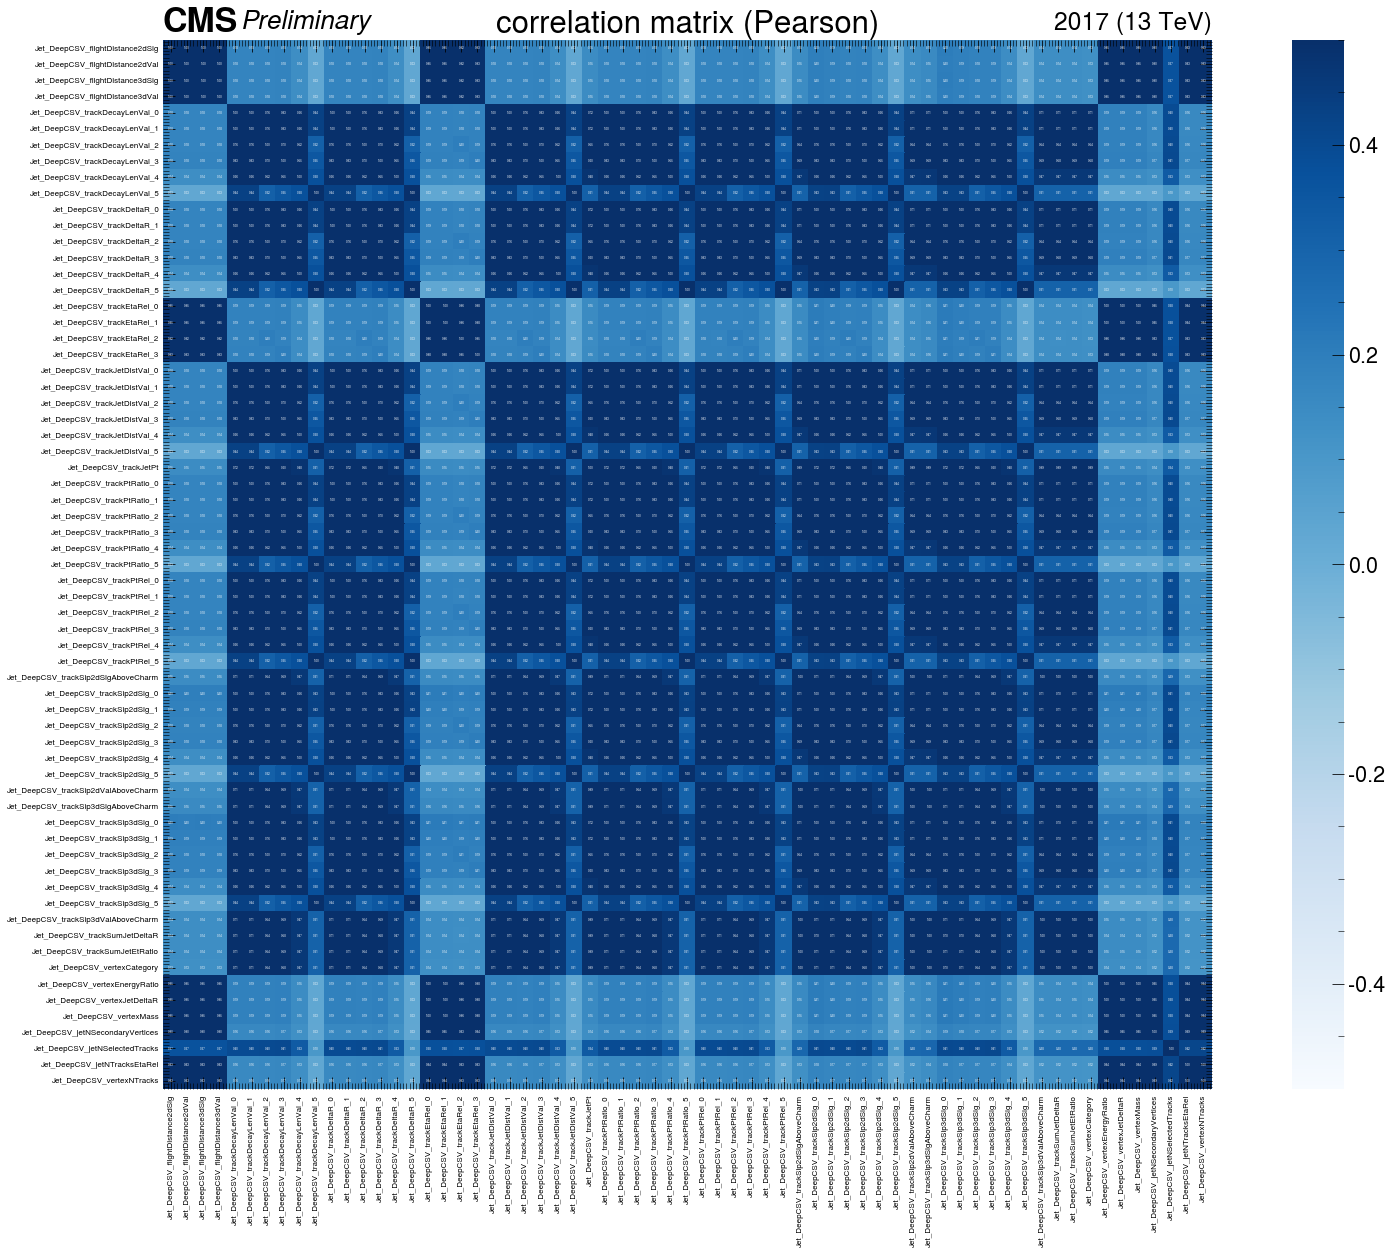

In [29]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Pearson)')
plt.tight_layout()

In [30]:
corr = df[deepCSV_input_branches].corr('kendall')

In [31]:
arr_corr = corr.to_numpy()

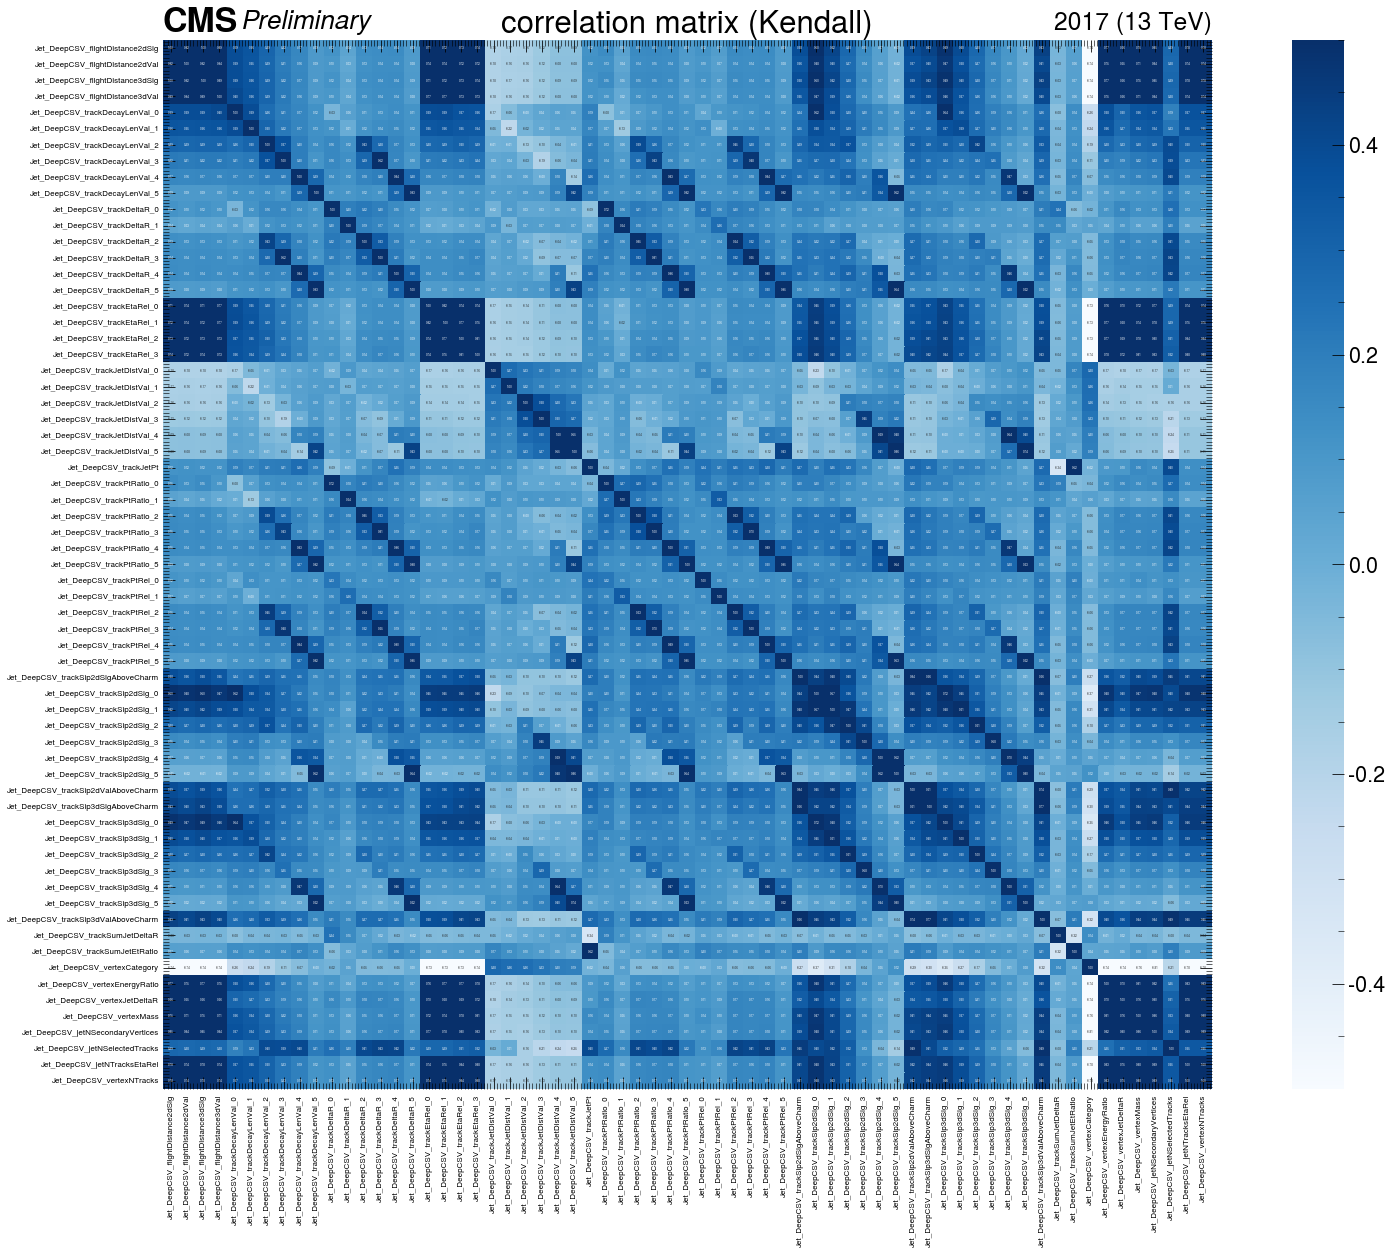

In [32]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Kendall)')
plt.tight_layout()

In [33]:
corr = df[deepCSV_input_branches].corr('spearman')

In [34]:
arr_corr = corr.to_numpy()

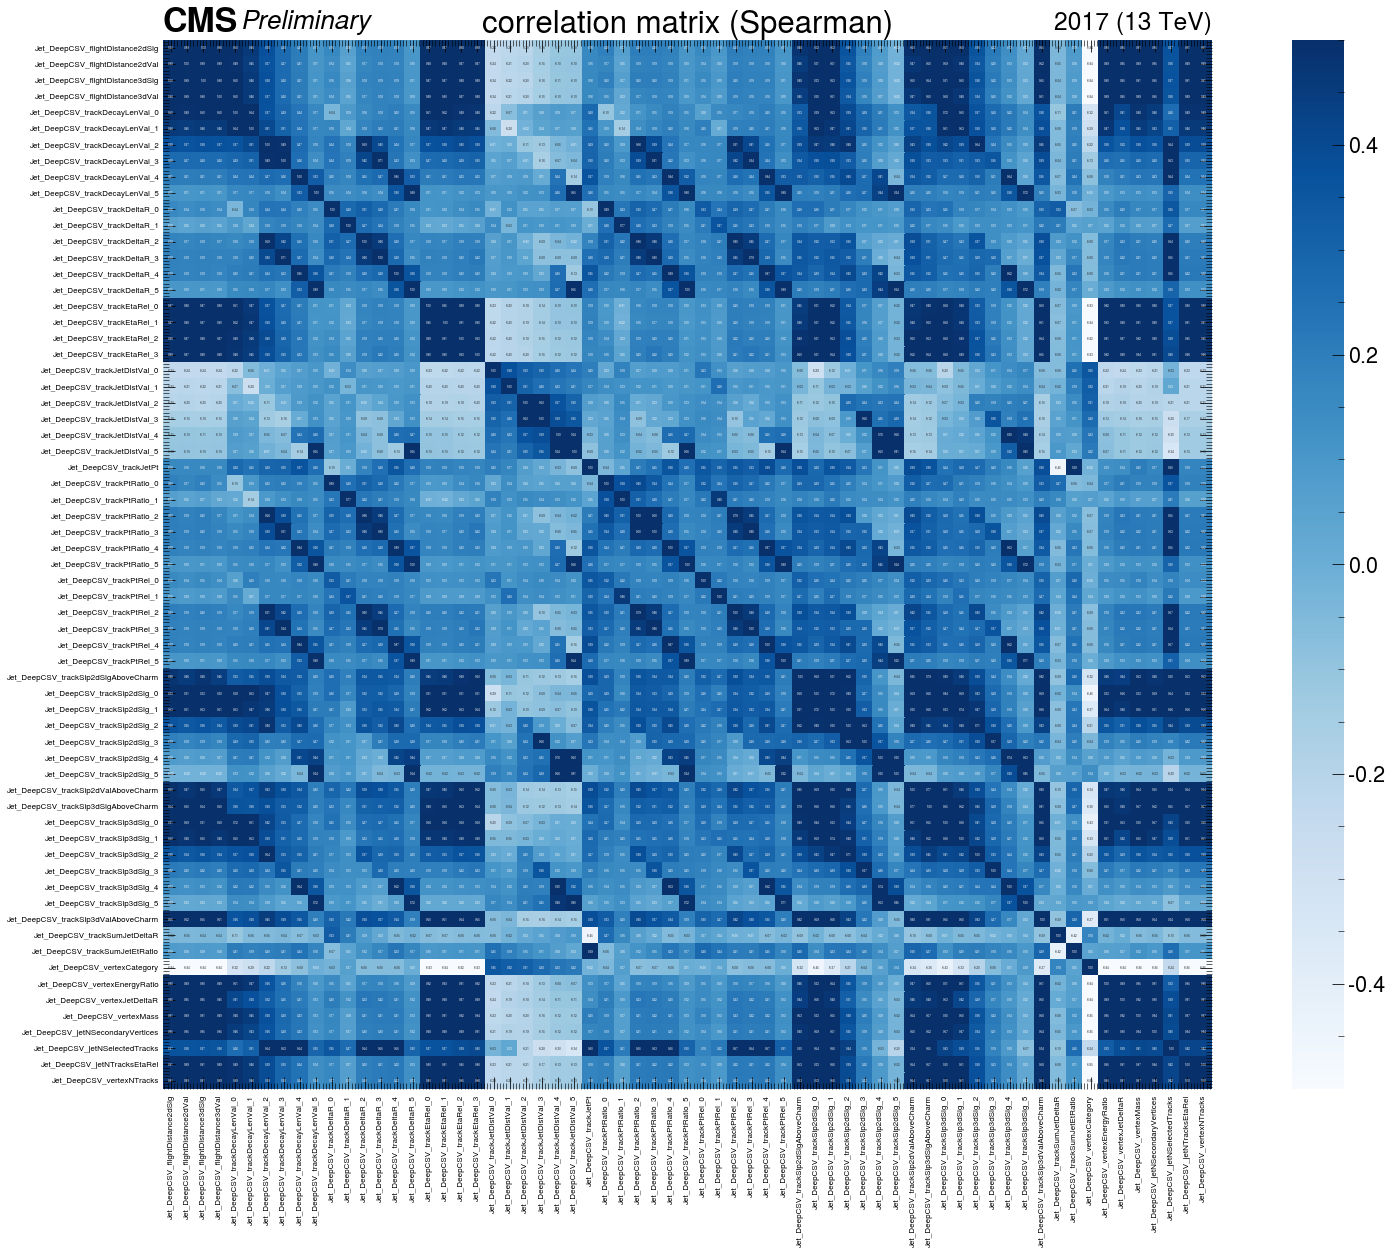

In [35]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Spearman)')
plt.tight_layout()

#### Default = -10

In [36]:
df = df.applymap(lambda x: -10 if (x == -999) else x)

In [37]:
corr = df[deepCSV_input_branches].corr()

In [38]:
arr_corr = corr.to_numpy()

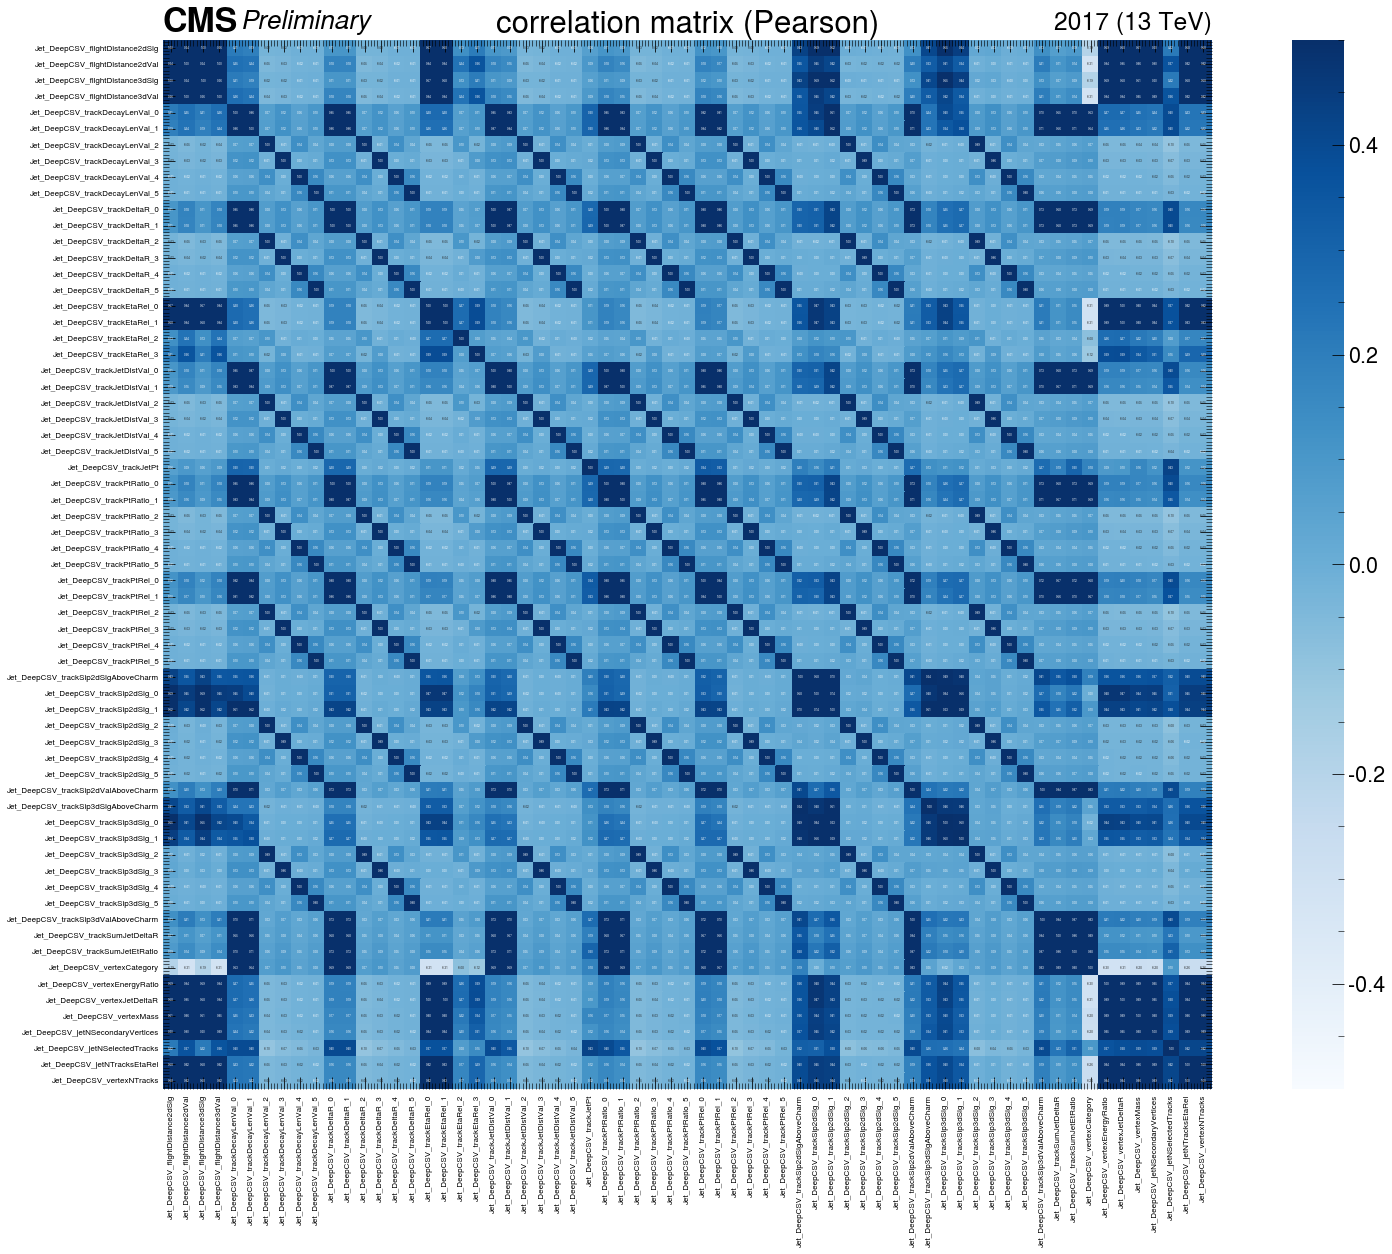

In [39]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Pearson)')
plt.tight_layout()

In [40]:
corr = df[deepCSV_input_branches].corr('kendall')

In [41]:
arr_corr = corr.to_numpy()

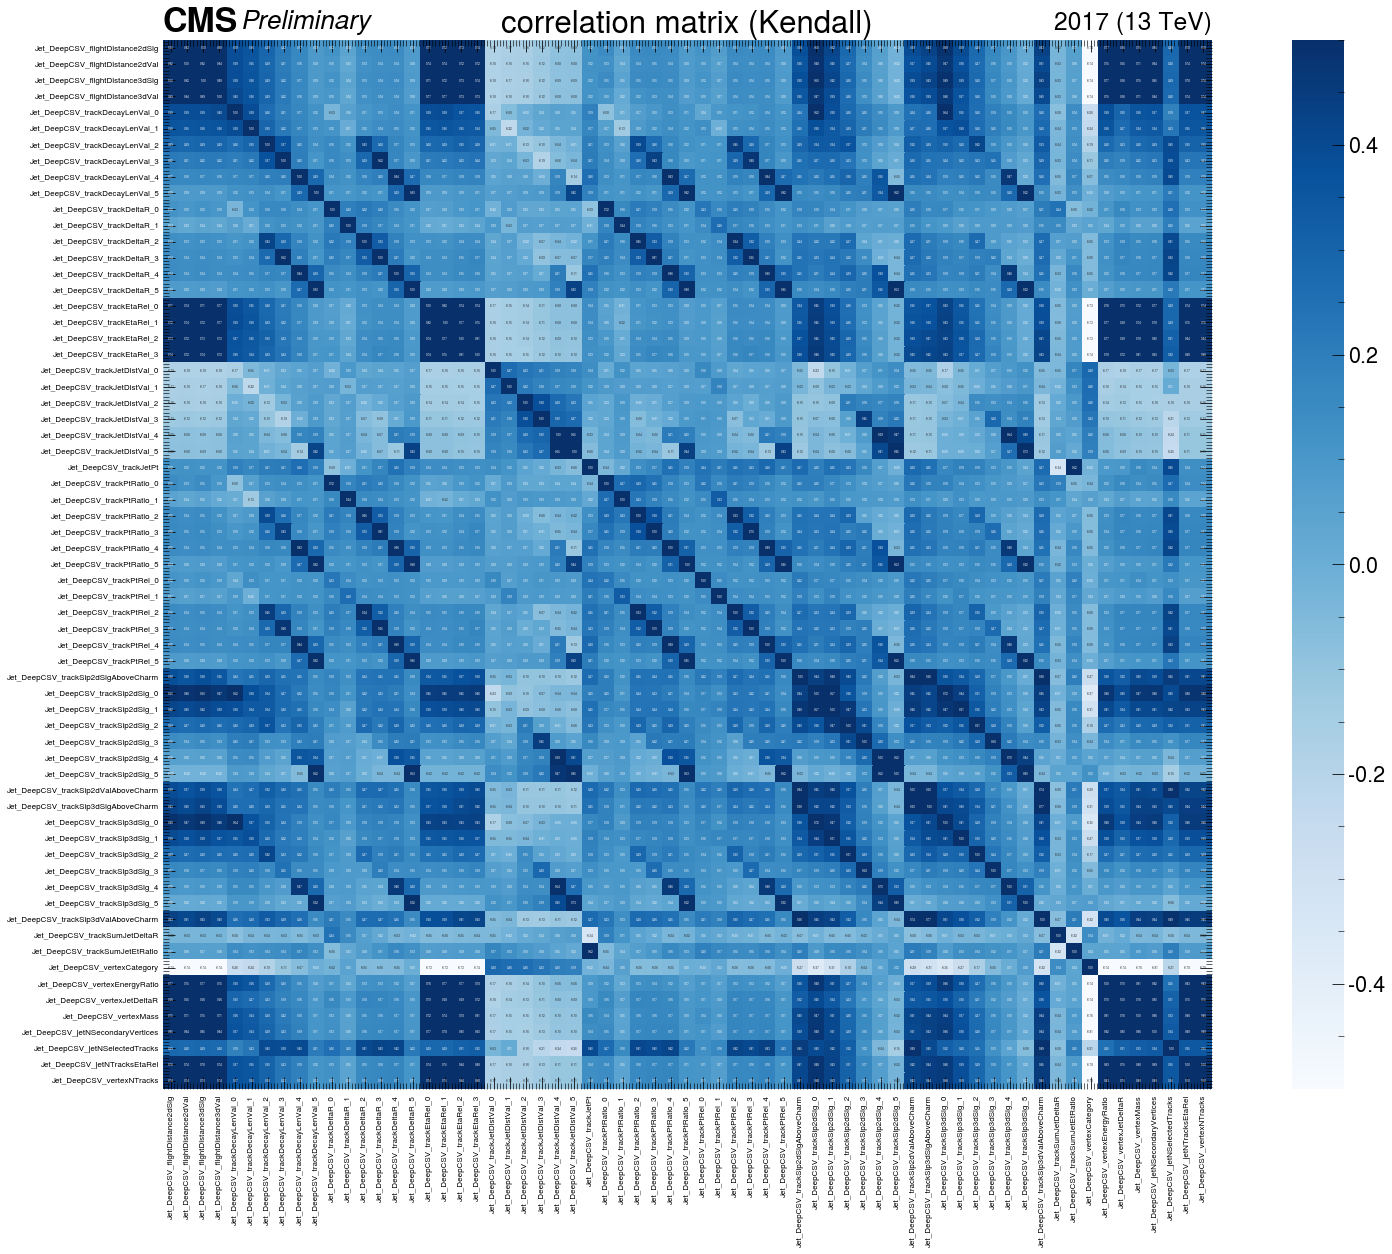

In [42]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Kendall)')
plt.tight_layout()

In [43]:
corr = df[deepCSV_input_branches].corr('spearman')

In [44]:
arr_corr = corr.to_numpy()

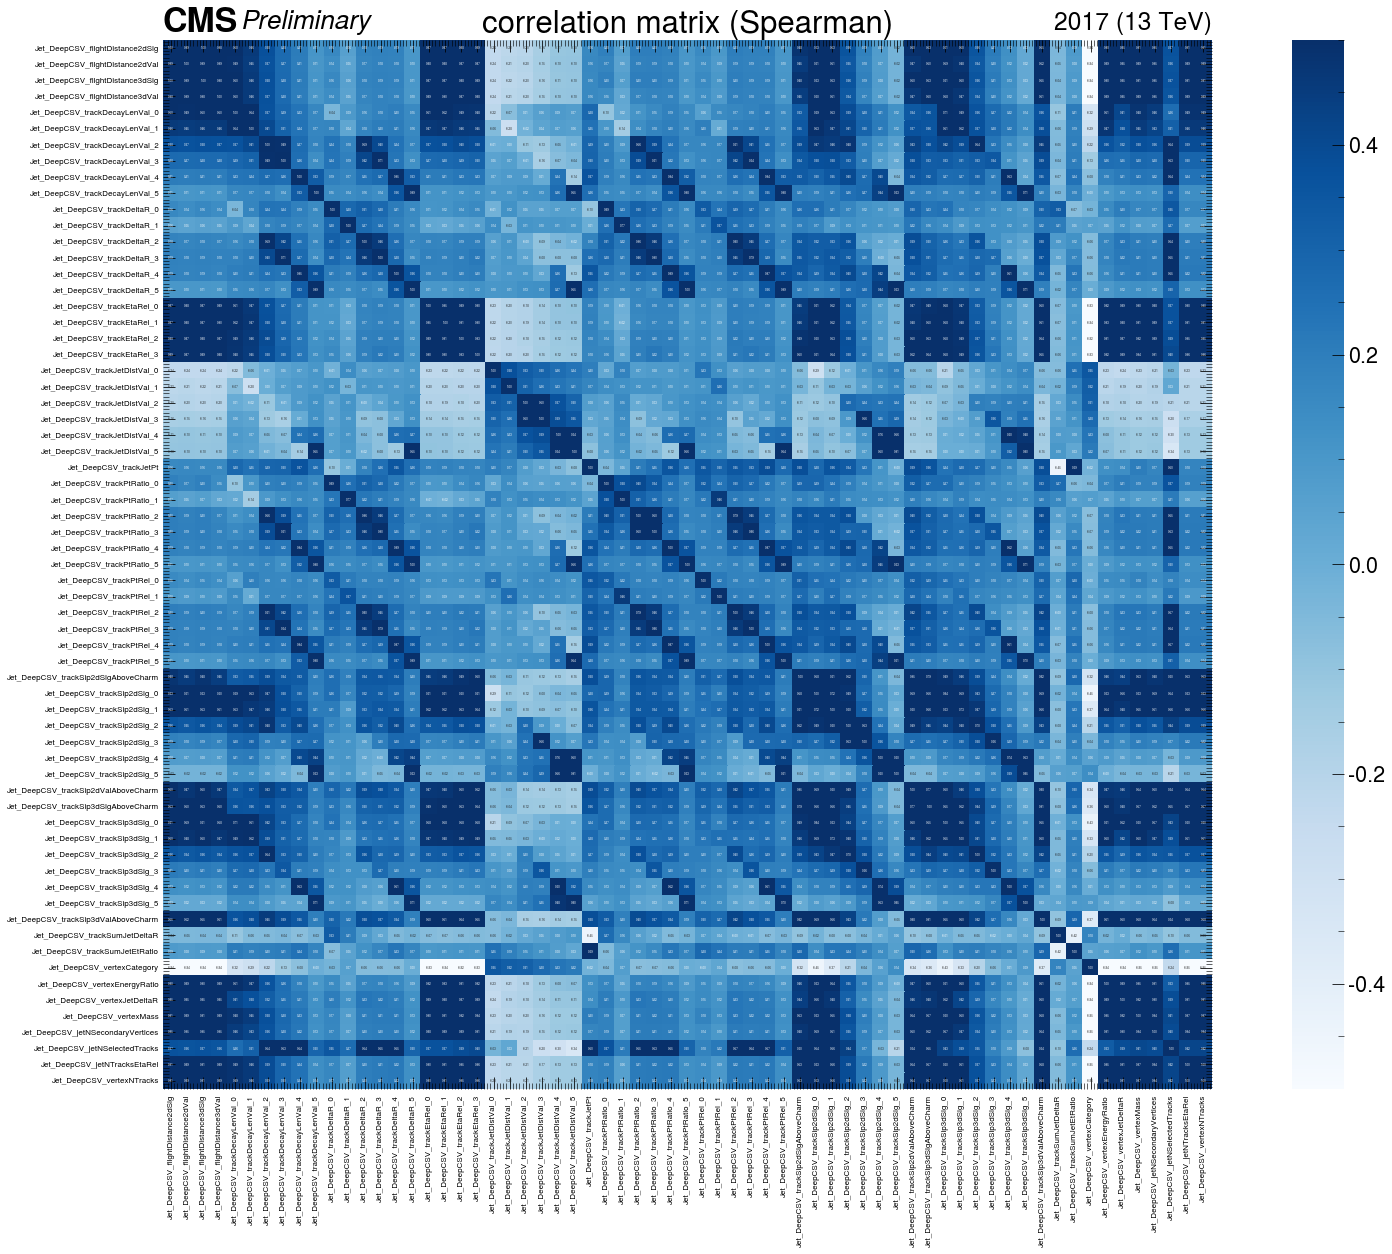

In [45]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Spearman)')
plt.tight_layout()

#### Default = 0

In [46]:
df = df.applymap(lambda x: 0 if (x == -999) else x)

In [47]:
corr = df[deepCSV_input_branches].corr()

In [48]:
arr_corr = corr.to_numpy()

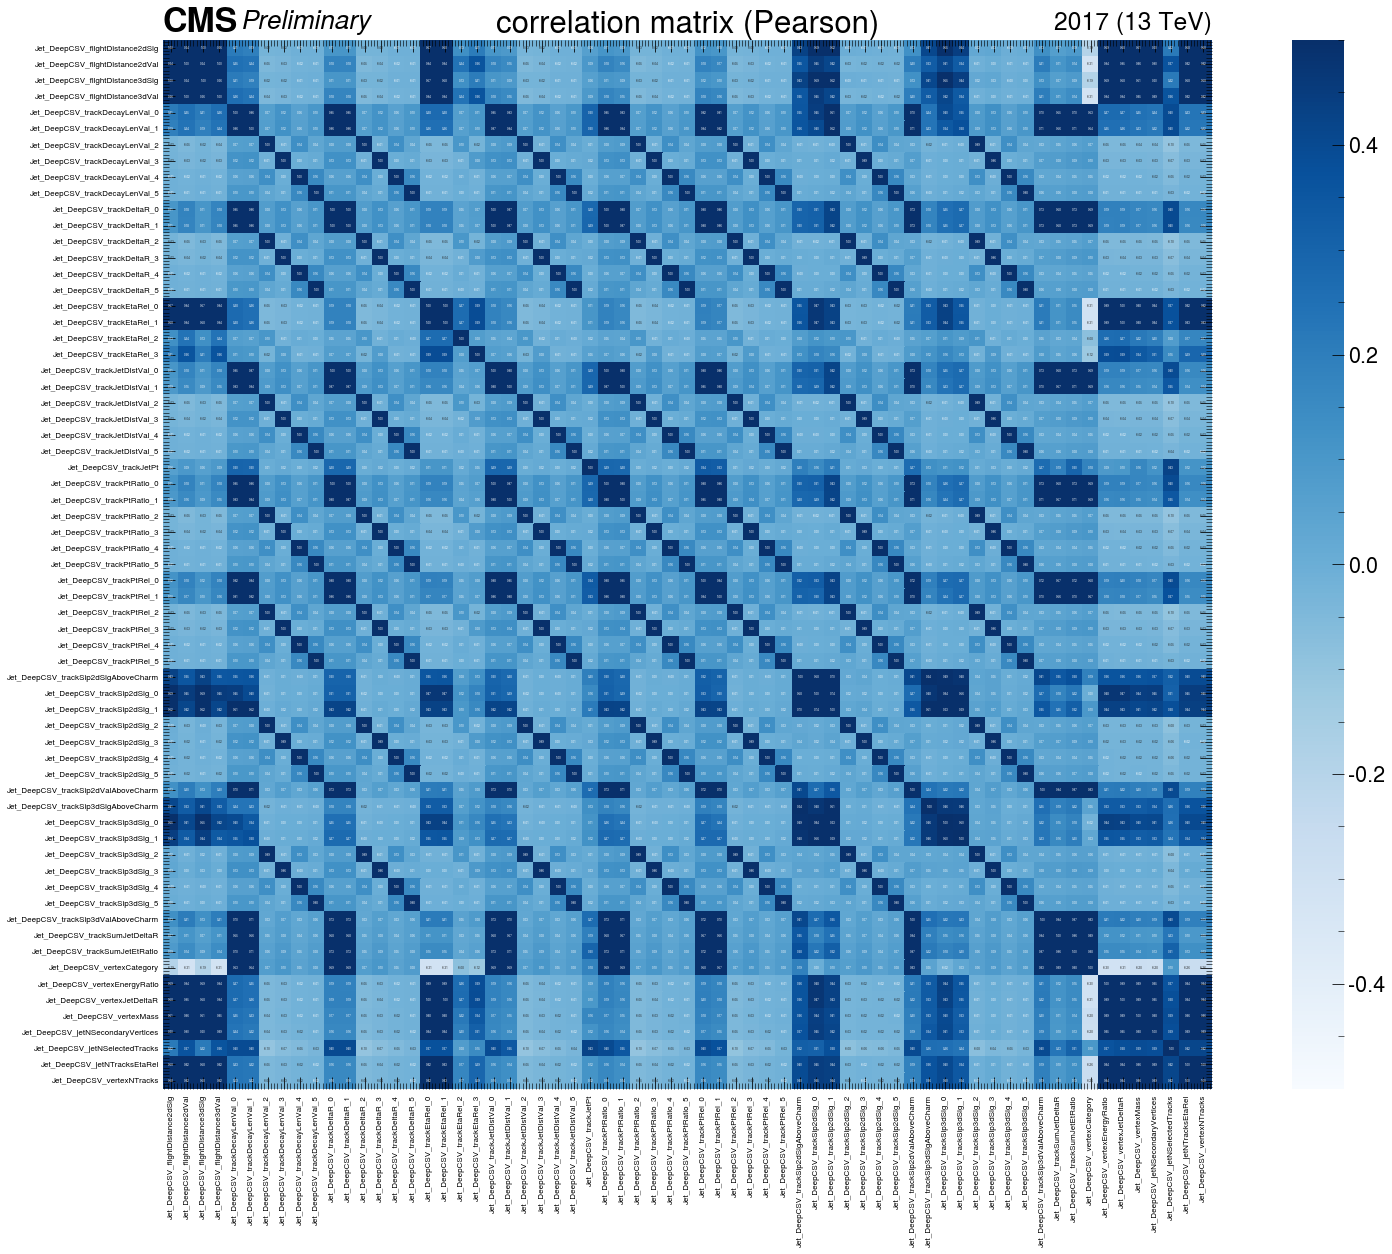

In [49]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Pearson)')
plt.tight_layout()

In [50]:
corr = df[deepCSV_input_branches].corr('kendall')

In [51]:
arr_corr = corr.to_numpy()

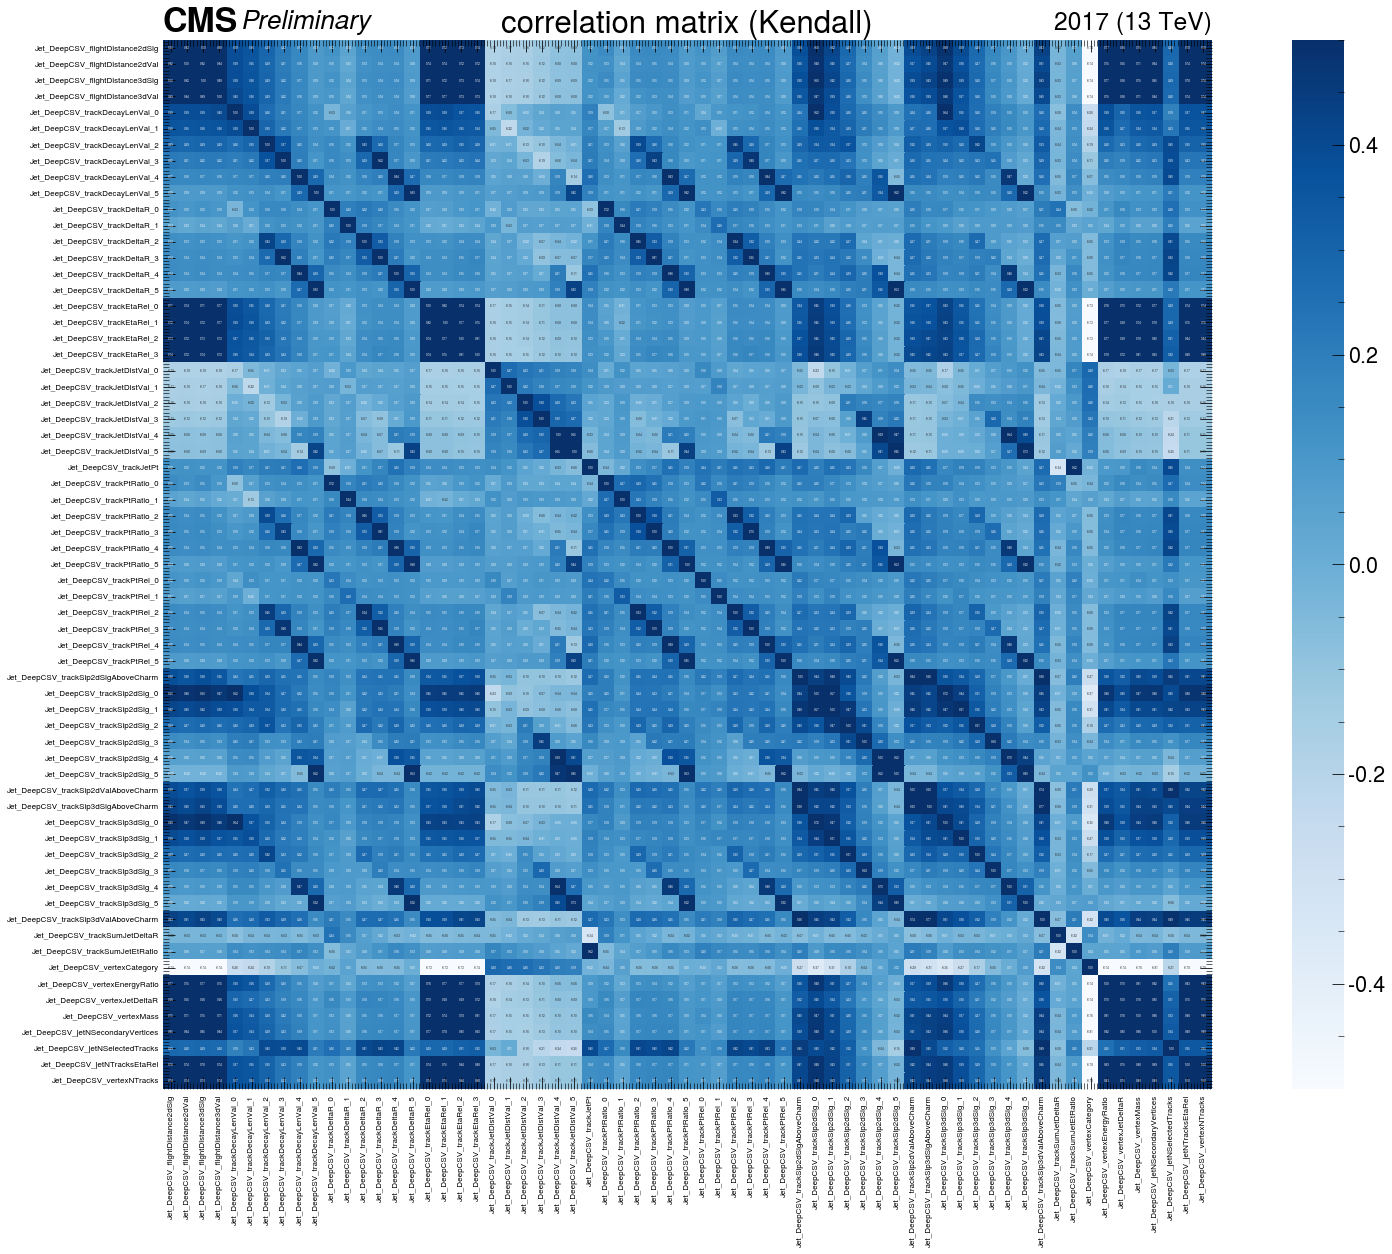

In [52]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Kendall)')
plt.tight_layout()

In [53]:
corr = df[deepCSV_input_branches].corr('spearman')

In [54]:
arr_corr = corr.to_numpy()

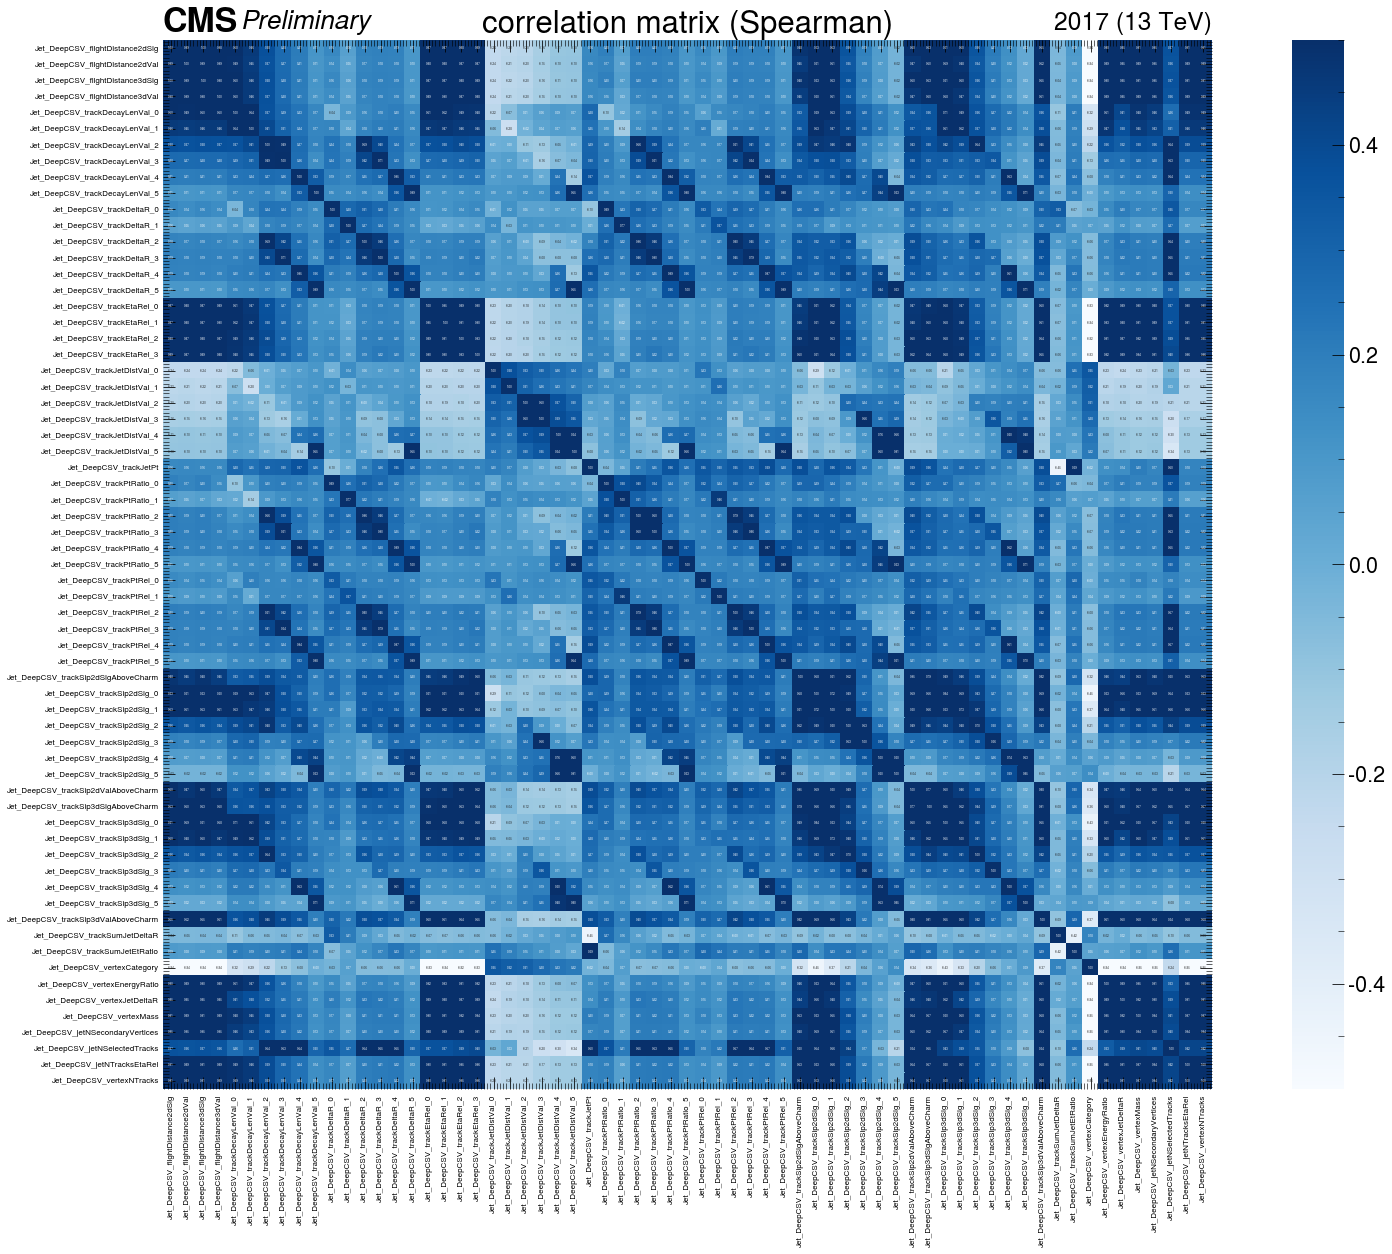

In [55]:
fig, ax = plt.subplots(figsize=(24, 18))
hep.cms.label(loc=0)

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix (Spearman)')
plt.tight_layout()